In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, 
                                                    random_state=0)

### 기본 Decision model

In [4]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [5]:
train_score = tree.score(x_train, y_train)
test_score = tree.score(x_test, y_test)

In [6]:
print('train: ', train_score)
print('test: ', test_score)
# 과대적합된 모델이다.

train:  1.0
test:  0.9020979020979021


### 가지치기

In [21]:
# 과대적합을 해소하기 위해 가지치기.
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
# max_depth -> 얼마나 깊게 가지치기 할건지
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [22]:
train_score = tree.score(x_train, y_train)
test_scco = tree.score(x_test, y_test)

In [23]:
print('train: ', train_score)
print('test: ', test_score)
# 기본모델 보다는 가지치기를 했을 때 과대적합 해소가 된다.

train:  0.9765258215962441
test:  0.9020979020979021


In [24]:
from sklearn.tree import export_graphviz
import graphviz

In [25]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [26]:
export_graphviz(tree, out_file='tree.dot', class_names=['악성', '양성'], 
                feature_names=cancer.feature_names, 
                impurity=False, filled=True)

In [18]:
with open('tree.dot', encoding= 'UTF-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [26]:
!pip install python-graphviz

ERROR: Could not find a version that satisfies the requirement python-graphviz (from versions: none)
ERROR: No matching distribution found for python-graphviz


In [27]:
from sklearn.tree import plot_tree

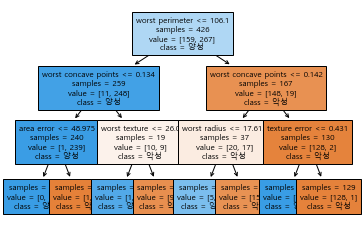

In [28]:
plot_tree(tree, class_names = ['악성', '양성'], 
          feature_names=cancer.feature_names, 
          impurity=False, filled=True, 
          fontsize=8)
plt.show()

### 특성중요도
- 특성중요도: 0-1 사이의 값/ 0: 이 특성이 전혀 사용되지 않았다, 1: 완벽하게 정답값을 예측했다.
- 0-1(0과 1사이 -> 확률)
- 특성 중요도의 전체 합 = 1

In [29]:
print('특성 중요도: \n', tree.feature_importances_)

특성 중요도: 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.01069388
 0.         0.01090021 0.         0.         0.         0.
 0.         0.         0.04022023 0.03226776 0.79120523 0.
 0.         0.         0.         0.11471269 0.         0.        ]


In [30]:
import numpy as np

(-1.0, 30.0)

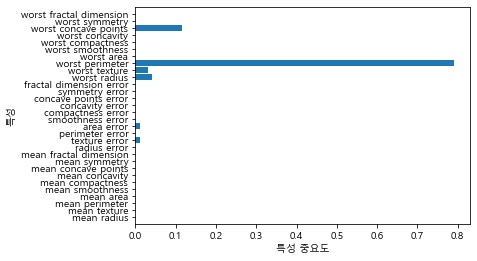

In [33]:
n_features = cancer.data.shape[1]
plt.barh(np.arange(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('특성 중요도')
plt.ylabel('특성')
plt.ylim(-1, n_features)
# 어떤 피쳐의 중요도가 높았는지 보여준다.

### decision tree regression

In [35]:
import os
import mglearn

In [47]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))
ram_prices

,Unnamed: 0,date,price
0,0,1957.00,4.110418e+08
1,1,1959.00,6.794772e+07
2,2,1960.00,5.242880e+06
3,3,1965.00,2.642412e+06
4,4,1970.00,7.340030e+05
...,...,...,...
328,328,2015.58,4.500000e-03
329,329,2015.67,4.300000e-03
330,330,2015.75,4.200000e-03
331,331,2015.83,3.800000e-03


In [50]:
del ram_prices['Unnamed: 0']
ram_prices

,date,price
0,1957.00,4.110418e+08
1,1959.00,6.794772e+07
2,1960.00,5.242880e+06
3,1965.00,2.642412e+06
4,1970.00,7.340030e+05
...,...,...
328,2015.58,4.500000e-03
329,2015.67,4.300000e-03
330,2015.75,4.200000e-03
331,2015.83,3.800000e-03


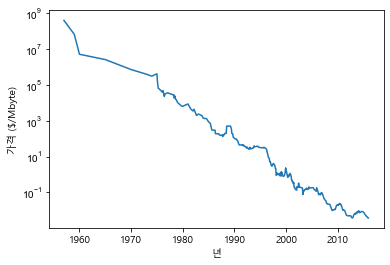

In [51]:
plt.yticks(fontname='Arial')
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('년')
plt.ylabel('가격 ($/Mbyte)')
plt.show()

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [70]:
# 2000년 이전 데이터를 훈련데이터로, 2000년 이후 데이터를 테스트 데이터로 사용
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [71]:
x_train = data_train.date.to_numpy()[:, np.newaxis]

In [72]:
y_train = np.log(data_train.price)

In [73]:
x_all = ram_prices.date.to_numpy()[:, np.newaxis]

In [75]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
linear_reg = LinearRegression().fit(x_train, y_train)

In [78]:
pred_tree = tree.predict(x_all)
pred_lr = linear_reg.predict(x_all)

In [79]:
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

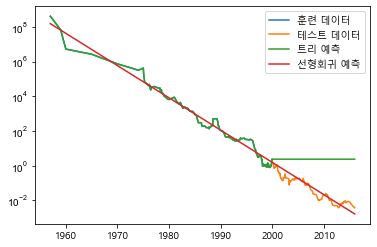

In [82]:
plt.yticks(fontname='Arial')
plt.semilogy(data_train.date, data_train.price, label='훈련 데이터')
plt.semilogy(data_test.date, data_test.price, label='테스트 데이터')
plt.semilogy(ram_prices.date, price_tree, label='트리 예측')
plt.semilogy(ram_prices.date, price_lr, label='선형회귀 예측')
plt.legend()
plt.show()